In [ ]:
%pip install gdown pandas numpy opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 6.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [gdown]32m1/3 [opencv-python]
Note: you may need to restart the kernel to use updated packages.


Some applications for line algebra is cosine similarity, convert color image to grayscale iamge, tabular data analysis, background subtraction

# Câu hỏi 1

In [1]:
import numpy as np

def compute_vector_length(vector):
    len_of_vector = 0
    for i in range(len(vector)):
        len_of_vector += vector[i] ** 2
    len_of_vector = np.sqrt(len_of_vector)
    return len_of_vector

vector = np.array([-2, 4, 9, 21])
result = compute_vector_length(vector)
print(round(result, 2))

23.28


In [ ]:
import numpy as np

def compute_vector_length(vector):
    return np.sqrt(np.sum(vector**2))

vector = np.array([-2, 4, 9, 21])
result = compute_vector_length(vector)
print(round(result, 2))#D

23.28


# Câu hỏi 2

In [ ]:
import numpy as np

def compute_dot_product(vector1, vector2):
    return np.dot(vector1, vector2)

v1 = np.array([0, 1, -1, 2])
v2 = np.array([2, 5, 1, 0])
result = compute_dot_product(v1, v2)
print(round(result, 2))#B

4


# Câu hỏi 3

In [ ]:
import numpy as np

def matrix_multi_vector(matrix, vector):
    result = np.dot(matrix, vector)
    return result

matrix = np.array([[-1, 1, 1], [0, -4, 9]])
vector = np.array([0, 2, 1])
result = matrix_multi_vector(matrix, vector)
print(result)#A


[3 1]


# Câu hỏi 4

In [ ]:
import numpy as np

def matrix_multi_matrix(matrix1, matrix2):
    result = np.dot(matrix1, matrix2)
    return result

m1 = np.array([[0, 1, 2], [2, -3, 1]])
m2 = np.array([[1, -3], [6, 1], [0, -1]])
result = matrix_multi_matrix(m1, m2)
print(result)#C

[[  6  -1]
 [-16 -10]]


# Câu hỏi 5

In [ ]:
import numpy as np

def compute_cosine(x, y):
    numerator = np.dot(x, y)
    denominator = compute_vector_length(x) * compute_vector_length(y)
    return numerator / denominator

x = np.array([1, 2, 3, 4])
y = np.array([1, 0, 3, 0])
result = compute_cosine(x, y)
print(round(result, 3))#C

0.577


# **Background Subtraction**

Input: Original Background Image, Target Background Image, Object Image
Idea:
- Make 3 images into the same size
- Bacground subtraction with `object image` and `original background image` => Get mask of object: 
  - Foreground mask (Binary image) including: 0 is background, 1 is the pixel region contain object
- Generate output image:
  - In pixel value `1`: replacing by `object image`'s value
  - In pixel value `0`: replacing by `taget background image`'s value

# Câu hỏi 6

In [8]:
import numpy as np
arr = np.arange(0,10)
print(arr[arr % 2 == 1])#a

[1 3 5 7 9]


In [14]:
!gdown 1QAXardZbIByfehzshQvbw4ByxiTC1ztU
!gdown 1DpKi1rgqHgAEAA0Cx2RWZs_7yWv5bv2T
!gdown 1DYO_g9_NPjwVOxXNZ4upEWjfHBm4byqU

Downloading...
From: https://drive.google.com/uc?id=1QAXardZbIByfehzshQvbw4ByxiTC1ztU
To: /home/banhmuy/zero-to-hero/AIO2025/M02/Object.png
100%|███████████████████████████████████████| 51.0k/51.0k [00:00<00:00, 644kB/s]
Downloading...
From: https://drive.google.com/uc?id=1DpKi1rgqHgAEAA0Cx2RWZs_7yWv5bv2T
To: /home/banhmuy/zero-to-hero/AIO2025/M02/GreenBackground.png
100%|██████████████████████████████████████| 5.51k/5.51k [00:00<00:00, 35.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1DYO_g9_NPjwVOxXNZ4upEWjfHBm4byqU
To: /home/banhmuy/zero-to-hero/AIO2025/M02/NewBackground.jpg
100%|███████████████████████████████████████| 64.3k/64.3k [00:00<00:00, 694kB/s]


In [11]:
import numpy as np
import cv2
import sys

IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    print("Google Colab environment")
    from google.colab.patches import cv2_imshow
    # Code for colab
    #cv2_imshow(image)
else:
    print("Local environment")
    # Code for local
    #cv2.imshow(window_name, image)
    # cv2.waitKey(0) # wait key before continuing
    # cv2.destroyAllWindows() #close all windows open by OpenCV


Local environment


1. Resize input image for the same size

In [1]:
import cv2
import sys

def read_image(filepath):
    img = cv2.imread(filepath) # default value IMREAD_COLOR
    if img is None:
        sys.exit("Could not read the image.")

    cv2.imshow("Display window", img)
    return img

In [ ]:
#load image
import numpy as np

#now then i loaded 2 image example
#green_background = read_image("./GreenBackground.png")
img = cv2.imread("./GreenBackground.png") # default value IMREAD_COLOR value 1

#cv2.imshow("Display window", img) meet error `Could not load the Qt platform plugin "xcb"``: apt install libxcb-cursor0,
# login as root and unlock some folder to install
# Result always crash when i want to show the image by using cv2.imshow:
#[error] Disposing session as kernel process died ExitCode: undefined, Reason: qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "~/miniconda3/envs/ds_env/lib/python3.11/site-packages/cv2/qt/plugins" even though it was found.
# This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.
# i using ubuntu wsl 2, so it cannot show the gui app

: 

In [21]:
import cv2
import sys
import matplotlib.pyplot as plt
import numpy as np

def show_image(img):
    # OpenCV read image BGR, Matplotlib read image RGB
    # So need change color channel to display image correctly
    if img is None:
        sys.exit("Could not read the image.")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

def read_image_plt(filepath):
    # Still return the image BGR for working with opencv
    img = cv2.imread(filepath, cv2.IMREAD_COLOR) # default value IMREAD_COLOR
    if img is None:
        sys.exit("Could not read the image.")
    return img

In [3]:
green_background = read_image_plt("./GreenBackground.png")
object = read_image_plt("./Object.png")
new_background = read_image_plt("./NewBackground.jpg")
%tb #see the full traceback
print(green_background.shape)
print(object.shape)
print(new_background.shape)

(381, 678, 3)
(381, 678, 3)
(408, 612, 3)


/home/banhmuy/miniconda3/envs/ds_env/lib/python3.11/site-packages/IPython/core/magics/execution.py:521: UserWarning: Error changing user exception modes.
Unrecognized mode in FormattedTB: <#see the full traceback>
Valid modes: ['Plain', 'Context', 'Verbose', 'Minimal', 'Docs']
  warn('Error changing %s exception modes.\n%s' %


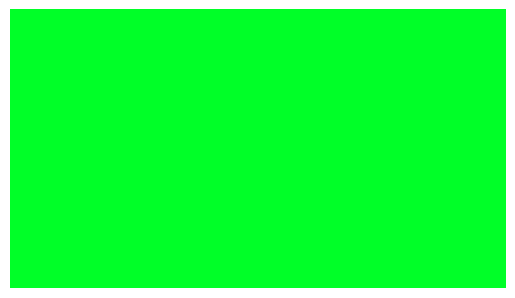

In [4]:
show_image(green_background)

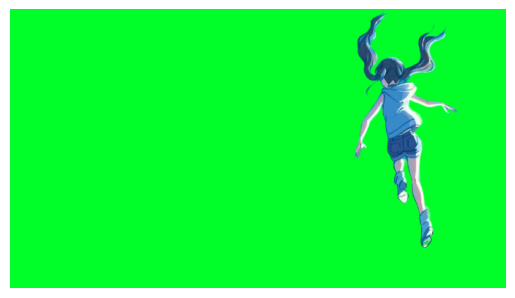

In [5]:
show_image(object)

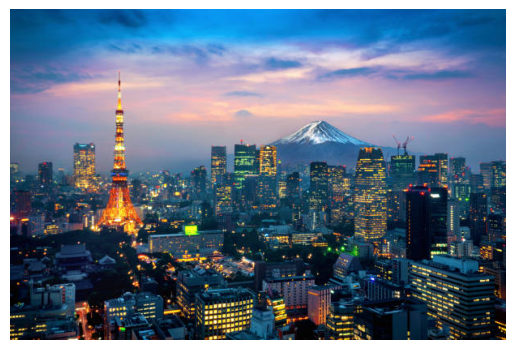

In [6]:
show_image(new_background)

In [7]:
#make same size
new_width = 678
new_height = 381 # or IMG_SIZE = (678, 381)
green_background = cv2.resize(green_background, (new_width, new_height))
object = cv2.resize(object, (new_width, new_height))
new_background = cv2.resize(new_background, (new_width, new_height))
print(green_background.shape)
print(object.shape)
print(new_background.shape)

(381, 678, 3)
(381, 678, 3)
(381, 678, 3)


2. Build compute_difference() function:

In [1]:
def compute_difference(img1, img2):
    difference = cv2.absdiff(img1, img2).mean(axis=2)
    return difference

In [8]:
difference = compute_difference(object, green_background)
print(difference.shape)
# using cv2_imshow to show the image instead


(381, 678)


3. Build compute_binary_mask() function:
  - Idea is create a Foreground mask (Binary image) including: 0 is background, 1 is the pixel region contain object
  - So we must have a `threshold`, now which pixel image value > threshold => replace value 

In [9]:
def compute_binary_mask(img):
    difference_binary = np.where(
        img >= 15, 255, 0
    )
    difference_binary = np.stack(
        (difference_binary,)*3, axis=-1
    )

    return difference_binary

In [10]:
binary_mask_image = compute_binary_mask(difference)
print(binary_mask_image.shape)
# using cv2_imshow to show the image instead

(381, 678, 3)


4. Build replace_background() function:
  - In pixel value `1`: replacing by `object image`'s value
  - In pixel value `0`: replacing by `taget background image`'s value
  - How to replace, binary mask image, object image and target background image are arrays, so I will you np.where to check for each value in array and replace

In [12]:
import numpy as np
def replace_background(green_background, object_image, new_background):
    difference_single_channel = compute_difference(green_background,object_image)
    binary_mask_image = compute_binary_mask(difference_single_channel)

    new_img = np.where(binary_mask_image == 255, object_image, new_background)
    return new_img

<class 'numpy.ndarray'>
(381, 678, 3)


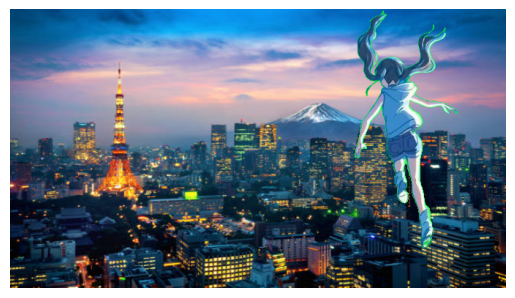

In [13]:
new_img = replace_background(green_background, object, new_background)
print(type(object))
print(object.shape)
show_image(new_img)

***Notice:***
- `cv2_imshow` of `from google.colab.patches import cv2_imshow` only using in google colab
- No function replace cv2.imshow which crashing in wsl because lacking of GUI/UI. 
  Guess fix by updating `wsl` to `wslg` but my Laptop stuck at 0% when updating them
- Currently, I'm using matplotlib for showing image, but only for RGB Image with 3 channels

# Câu hỏi 7

In [9]:
import numpy as np
arr = np.arange(0, 10)
arr[arr % 2 == 1] = -1
print(arr)#B

[ 0 -1  2 -1  4 -1  6 -1  8 -1]


# Câu hỏi 8

In [ ]:
import numpy as np
arr1 = np.arange(10).reshape(2, -1)
#=> [[0 1 2 3 4]
#    [5 6 7 8 9]]
arr2 = np.ones((2, 5), dtype=int)
#=> [[1 1 1 1 1]
#    [1 1 1 1 1]]
c = np.concatenate([arr1, arr2], axis=0)
print(c)#A

[[0 1 2 3 4]
 [5 6 7 8 9]
 [1 1 1 1 1]
 [1 1 1 1 1]]


# Câu hỏi 9

In [ ]:
import numpy as np
arr1 = np.arange(10).reshape(2,-1)
arr2 = np.ones((2,5), dtype=int)

c = np.concatenate([arr1, arr2], axis=1)
print(c)#c

[[0 1 2 3 4 1 1 1 1 1]
 [5 6 7 8 9 1 1 1 1 1]]


# Câu hỏi 10

In [ ]:
import numpy as np

a = np.array([2, 6, 1, 9, 10, 3, 27])
i = np.where((a>=5)&(a<=10))
# print(i) #(array([1, 3, 4]),)
print(a[i])#C

[ 6  9 10]


Image processing

# Câu hỏi 11

In [1]:
!gdown 1KAZQVg40mG0vuEdC4HbjkDdms_brf2bW



Downloading...
From: https://drive.google.com/uc?id=1KAZQVg40mG0vuEdC4HbjkDdms_brf2bW
To: /home/banhmuy/zero-to-hero/AIO2025/M02/dog.jpeg
100%|██████████████████████████████████████| 33.7k/33.7k [00:00<00:00, 93.8MB/s]


In [9]:
import matplotlib.image as mpimg
import numpy as np
import cv2
import sys

# read image
img = cv2.imread("dog.jpeg")#BGR image
if img is None:
    sys.exit("Can not read the image!")

print("Size of image (H,W,C):", img.shape)
# print("image array:", img)
# To easy imagine:
# image = np.array([
#     [ [255, 0, 0], [0, 255, 0] ],
#     [ [0, 0, 255], [100, 50, 150] ]
# ])

Size of image (H,W,C): (534, 800, 3)


# Câu hỏi 11

In [ ]:
# *********** Your code here ***********
# Sử dụng công thức Lightness: (max(R,G,B) + min(R,G,B))/2
# Chuyển ảnh màu sang xám
gray_img_01 = (np.max(img, axis=-1, keepdims=True) + np.min(img, axis=-1, keepdims=True))/2
# axis=-1 to get the last axis of an array
# for the image (H,W,C), it will get color axis meaning that axis=2
# each will goto each pixel and look into the R,G,B value
# and get the max/min value of them
# keepdims=True cause by we need to keep the dimensions origin image
print(gray_img_01[0, 0])#A

[102.5]


# Câu hỏi 12

In [12]:
# *********** Your code here ***********
# Sử dụng công thức Average: (R+G+B)/3
gray_img_02 = np.average(img, axis=2,keepdims=True)

print(gray_img_02[0, 0])#A

[107.66666667]


# Câu hỏi 13

In [ ]:
# *********** Your code here ***********
# Sử dụng công thức Luminosity: 0.21*R + 0.72*G + 0.07*B
luminosity_constant = [0.07,0.72,0.21]
gray_img_03 = np.dot(img[...,:3], luminosity_constant).astype(np.uint8)
# img[...,:3]
# ... mean that all dimension before it, :3 get e index 0,1,2
# explain: get all dimension (height, width),
# and in the color channel dimension, get value at index 0,1,2 (BGR)
# similar to:
# gray_img_03 = 0.21*img[:,:,0] + 0.72*img[:,:,1] + 0.07*img[:,:,2]

print(gray_img_03[0, 0])#C

126


# Câu hỏi 14

In [ ]:
import numpy as np

green_background = read_image_plt("./GreenBackground.png")
object = read_image_plt("./Object.png")
new_width = 678
new_height = 381 # or IMG_SIZE = (678, 381)
green_background = cv2.resize(green_background, (new_width, new_height))
object = cv2.resize(object, (new_width, new_height))

def compute_difference(bg_img, input_img):
    return np.abs(bg_img - input_img).mean(axis=2)

# calculate img BG - img input, axis=2 mean the color channel
# for each pixel BGR
difference_single_channel = compute_difference(green_background, object)
print(difference_single_channel.shape)#C


(381, 678)


# Câu hỏi 15

In [ ]:
def compute_binary_mask(difference_single_channel):
    binary_mask = (difference_single_channel > 50).astype(np.uint8) * 255
    return binary_mask

difference_single_channel = np.random.rand(678, 381) * 100
binary_mask = compute_binary_mask(difference_single_channel)
print(binary_mask.dtype)#A

uint8


# Câu hỏi 16

In [19]:
!gdown 1YF4WkCaaGYd2Zm-PNoLa2A2tFf3e64ci

Downloading...
From: https://drive.google.com/uc?id=1YF4WkCaaGYd2Zm-PNoLa2A2tFf3e64ci
To: /home/banhmuy/zero-to-hero/AIO2025/M02/advertising.csv
100%|██████████████████████████████████████| 4.06k/4.06k [00:00<00:00, 30.8MB/s]


In [26]:
import pandas as pd
import numpy as np

df = pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [32]:
data = df.to_numpy()
sales = data[:,-1]
max_value = np.max(sales)
max_index = np.argmax(sales)#*sale: mean get 200 values inside
print(f"Max: {max_value} - Index: {max_index}")#C

Max: 27.0 - Index: 175


# Câu hỏi 17

In [ ]:
tv = data[:,0]
print(tv.mean())#B

147.0425


# Câu hỏi 18

In [39]:
#count sales
print(np.sum(sales >= 20))#A

40


# Câu hỏi 19

In [ ]:
radio = data[:,1]
print(np.mean(radio[sales >= 15]))#B

26.22293577981651


# Câu hỏi 20

In [ ]:
newspaper = data[:, 2]
print(np.sum(sales[newspaper > np.mean(newspaper)]))#C

1405.1
